<a href="https://colab.research.google.com/github/sumanth232/x/blob/master/Data_Modelling_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import sklearn.model_selection as model_selection
from google.colab import drive
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd 'drive/My Drive/BDSA_shared'

/content/drive/.shortcut-targets-by-id/1jx5F-Hk_qSz-KPSADLaAT-AL_G-uIiGF/BDSA_shared


In [ ]:
data = pd.read_csv('complete_with_population.csv')
data = data.drop(columns="Unnamed: 0")
original_data = data.copy()
data

,Date,FIPS,State,State_index,Population,Retail_14_days_before,Retail_13_days_before,Retail_12_days_before,Retail_11_days_before,Retail_10_days_before,Retail_9_days_before,Retail_8_days_before,Retail_7_days_before,Retail_6_days_before,Retail_5_days_before,Retail_4_days_before,Retail_3_days_before,Retail_2_days_before,Retail_1_days_before,Grocery_14_days_before,Grocery_13_days_before,Grocery_12_days_before,Grocery_11_days_before,Grocery_10_days_before,Grocery_9_days_before,Grocery_8_days_before,Grocery_7_days_before,Grocery_6_days_before,Grocery_5_days_before,Grocery_4_days_before,Grocery_3_days_before,Grocery_2_days_before,Grocery_1_days_before,Parks_14_days_before,Parks_13_days_before,Parks_12_days_before,Parks_11_days_before,Parks_10_days_before,Parks_9_days_before,Parks_8_days_before,...,Residences_10_days_before,Residences_9_days_before,Residences_8_days_before,Residences_7_days_before,Residences_6_days_before,Residences_5_days_before,Residences_4_days_before,Residences_3_days_before,Residences_2_days_before,Residences_1_days_before,cases_per_population_14_days_before,cases_per_population_13_days_before,cases_per_population_12_days_before,cases_per_population_11_days_before,cases_per_population_10_days_before,cases_per_population_9_days_before,cases_per_population_8_days_before,cases_per_population_7_days_before,cases_per_population_6_days_before,cases_per_population_5_days_before,cases_per_population_4_days_before,cases_per_population_3_days_before,cases_per_population_2_days_before,cases_per_population_1_days_before,deaths_per_population_14_days_before,deaths_per_population_13_days_before,deaths_per_population_12_days_before,deaths_per_population_11_days_before,deaths_per_population_10_days_before,deaths_per_population_9_days_before,deaths_per_population_8_days_before,deaths_per_population_7_days_before,deaths_per_population_6_days_before,deaths_per_population_5_days_before,deaths_per_population_4_days_before,deaths_per_population_3_days_before,deaths_per_population_2_days_before,deaths_per_population_1_days_before,Target_Cases,Target_Deaths
0,03-28-20,1003,Alabama,1,223234.0,16,16,9,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,42,49,39,31,31,24,13,2,-6,-9,-9,-8,-10,-9,92,84,48,57,58,31,8,...,6,8,10,9,8,10,12,11,12,13,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000639,0.000000
1,03-29-20,1003,Alabama,1,223234.0,16,9,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,49,39,31,31,24,13,2,-6,-9,-9,-8,-10,-9,-14,84,48,57,58,31,8,-25,...,8,10,9,8,10,12,11,12,13,9,0.000064,0.000064,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000959,0.000000
2,03-30-20,1003,Alabama,1,223234.0,9,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,-47,39,31,31,24,13,2,-6,-9,-9,-8,-10,-9,-14,-19,48,57,58,31,8,-25,-14,...,10,9,8,10,12,11,12,13,9,9,0.000064,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000639,0.000959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001151,0.000000
3,03-31-20,1003,Alabama,1,223234.0,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,-47,-41,31,31,24,13,2,-6,-9,-9,-8,-10,-9,-14,-19,-18,57,58,31,8,-25,-14,-27,...,9,8,10,12,11,12,13,9,9,12,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000639,0.000959,0.001151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001214,0.000000
4,04-01-20,1003,Alabama,1,223234.0,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,-47,-41,-43,31,24,13,2,-6,-9,-9,-8,-

In [ ]:
counties_count = len(data[:]['FIPS'].unique())
print('counties_count = ', counties_count)

states_count = len(data[:]['State'].unique())
print('states_count = ', states_count)
# data['FIPS'].unique()

counties_count =  660
states_count =  50


In [ ]:
# data['Target_Cases'] = (data['Target_Cases'] * data['Population']).astype(int)

# col = 'cases_per_population'

# DAYS_BEFORE = 14
# for day in range(1,DAYS_BEFORE+1):
#       col_name = '%s_%d_days_before' % (col, day)
#       data[col_name] = data[col_name] * data['Population']
#       data[col_name] = data[col_name].astype(int)

data

,Date,FIPS,State,State_index,Population,Retail_14_days_before,Retail_13_days_before,Retail_12_days_before,Retail_11_days_before,Retail_10_days_before,Retail_9_days_before,Retail_8_days_before,Retail_7_days_before,Retail_6_days_before,Retail_5_days_before,Retail_4_days_before,Retail_3_days_before,Retail_2_days_before,Retail_1_days_before,Grocery_14_days_before,Grocery_13_days_before,Grocery_12_days_before,Grocery_11_days_before,Grocery_10_days_before,Grocery_9_days_before,Grocery_8_days_before,Grocery_7_days_before,Grocery_6_days_before,Grocery_5_days_before,Grocery_4_days_before,Grocery_3_days_before,Grocery_2_days_before,Grocery_1_days_before,Parks_14_days_before,Parks_13_days_before,Parks_12_days_before,Parks_11_days_before,Parks_10_days_before,Parks_9_days_before,Parks_8_days_before,...,Residences_10_days_before,Residences_9_days_before,Residences_8_days_before,Residences_7_days_before,Residences_6_days_before,Residences_5_days_before,Residences_4_days_before,Residences_3_days_before,Residences_2_days_before,Residences_1_days_before,cases_per_population_14_days_before,cases_per_population_13_days_before,cases_per_population_12_days_before,cases_per_population_11_days_before,cases_per_population_10_days_before,cases_per_population_9_days_before,cases_per_population_8_days_before,cases_per_population_7_days_before,cases_per_population_6_days_before,cases_per_population_5_days_before,cases_per_population_4_days_before,cases_per_population_3_days_before,cases_per_population_2_days_before,cases_per_population_1_days_before,deaths_per_population_14_days_before,deaths_per_population_13_days_before,deaths_per_population_12_days_before,deaths_per_population_11_days_before,deaths_per_population_10_days_before,deaths_per_population_9_days_before,deaths_per_population_8_days_before,deaths_per_population_7_days_before,deaths_per_population_6_days_before,deaths_per_population_5_days_before,deaths_per_population_4_days_before,deaths_per_population_3_days_before,deaths_per_population_2_days_before,deaths_per_population_1_days_before,Target_Cases,Target_Deaths
0,03-28-20,1003,Alabama,1,223234.0,16,16,9,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,42,49,39,31,31,24,13,2,-6,-9,-9,-8,-10,-9,92,84,48,57,58,31,8,...,6,8,10,9,8,10,12,11,12,13,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000639,0.000000
1,03-29-20,1003,Alabama,1,223234.0,16,9,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,49,39,31,31,24,13,2,-6,-9,-9,-8,-10,-9,-14,84,48,57,58,31,8,-25,...,8,10,9,8,10,12,11,12,13,9,0.000064,0.000064,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000959,0.000000
2,03-30-20,1003,Alabama,1,223234.0,9,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,-47,39,31,31,24,13,2,-6,-9,-9,-8,-10,-9,-14,-19,48,57,58,31,8,-25,-14,...,10,9,8,10,12,11,12,13,9,9,0.000064,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000639,0.000959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001151,0.000000
3,03-31-20,1003,Alabama,1,223234.0,1,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,-47,-41,31,31,24,13,2,-6,-9,-9,-8,-10,-9,-14,-19,-18,57,58,31,8,-25,-14,-27,...,9,8,10,12,11,12,13,9,9,12,0.000064,0.000064,0.000064,0.000128,0.000128,0.000128,0.000192,0.000256,0.000256,0.000320,0.000320,0.000639,0.000959,0.001151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001214,0.000000
4,04-01-20,1003,Alabama,1,223234.0,-3,-14,-28,-39,-40,-35,-36,-34,-36,-36,-43,-47,-41,-43,31,24,13,2,-6,-9,-9,-8,-

In [ ]:
data = data.iloc[:,3:]

In [ ]:
data = (data - data.min(axis=0))/(data.max(axis=0) - data.min(axis=0))
data

,State_index,Population,Retail_14_days_before,Retail_13_days_before,Retail_12_days_before,Retail_11_days_before,Retail_10_days_before,Retail_9_days_before,Retail_8_days_before,Retail_7_days_before,Retail_6_days_before,Retail_5_days_before,Retail_4_days_before,Retail_3_days_before,Retail_2_days_before,Retail_1_days_before,Grocery_14_days_before,Grocery_13_days_before,Grocery_12_days_before,Grocery_11_days_before,Grocery_10_days_before,Grocery_9_days_before,Grocery_8_days_before,Grocery_7_days_before,Grocery_6_days_before,Grocery_5_days_before,Grocery_4_days_before,Grocery_3_days_before,Grocery_2_days_before,Grocery_1_days_before,Parks_14_days_before,Parks_13_days_before,Parks_12_days_before,Parks_11_days_before,Parks_10_days_before,Parks_9_days_before,Parks_8_days_before,Parks_7_days_before,Parks_6_days_before,Parks_5_days_before,...,Residences_10_days_before,Residences_9_days_before,Residences_8_days_before,Residences_7_days_before,Residences_6_days_before,Residences_5_days_before,Residences_4_days_before,Residences_3_days_before,Residences_2_days_before,Residences_1_days_before,cases_per_population_14_days_before,cases_per_population_13_days_before,cases_per_population_12_days_before,cases_per_population_11_days_before,cases_per_population_10_days_before,cases_per_population_9_days_before,cases_per_population_8_days_before,cases_per_population_7_days_before,cases_per_population_6_days_before,cases_per_population_5_days_before,cases_per_population_4_days_before,cases_per_population_3_days_before,cases_per_population_2_days_before,cases_per_population_1_days_before,deaths_per_population_14_days_before,deaths_per_population_13_days_before,deaths_per_population_12_days_before,deaths_per_population_11_days_before,deaths_per_population_10_days_before,deaths_per_population_9_days_before,deaths_per_population_8_days_before,deaths_per_population_7_days_before,deaths_per_population_6_days_before,deaths_per_population_5_days_before,deaths_per_population_4_days_before,deaths_per_population_3_days_before,deaths_per_population_2_days_before,deaths_per_population_1_days_before,Target_Cases,Target_Deaths
0,0.0,0.020176,0.456,0.456,0.455319,0.592814,0.539773,0.336,0.280,0.236,0.232,0.268085,0.352273,0.256,0.248,0.248,0.857143,0.900621,0.838509,0.788820,0.788820,0.745342,0.677019,0.608696,0.559006,0.540373,0.540373,0.546584,0.534161,0.540373,0.243316,0.232620,0.184492,0.196524,0.197861,0.161765,0.131016,0.086898,0.101604,0.084225,...,0.500000,0.531250,0.562500,0.546875,0.531250,0.562500,0.593750,0.578125,0.593750,0.609375,0.000067,0.000067,0.000067,0.000066,0.000066,0.000066,0.000131,0.000131,0.000131,0.000196,0.000260,0.000259,0.000322,0.000320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000638,0.000000
1,0.0,0.020176,0.456,0.428,0.421277,0.568862,0.477273,0.280,0.236,0.232,0.252,0.263830,0.363636,0.248,0.248,0.220,0.900621,0.838509,0.788820,0.788820,0.745342,0.677019,0.608696,0.559006,0.540373,0.540373,0.546584,0.534161,0.540373,0.509317,0.232620,0.184492,0.196524,0.197861,0.161765,0.131016,0.086898,0.101604,0.084225,0.092246,...,0.531250,0.562500,0.546875,0.531250,0.562500,0.593750,0.578125,0.593750,0.609375,0.546875,0.000067,0.000067,0.000067,0.000066,0.000066,0.000132,0.000131,0.000131,0.000196,0.000262,0.000260,0.000324,0.000322,0.000641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000957,0.000000
2,0.0,0.020176,0.428,0.396,0.404255,0.502994,0.397727,0.236,0.232,0.252,0.248,0.272340,0.352273,0.248,0.220,0.204,0.838509,0.788820,0.788820,0.745342,0.677019,0.608696,0.559006,0.540373,0.540373,0.546584,0.534161,0.540373,0.509317,0.478261,0.184492,0.196524,0.197861,0.161765,0.131016,0.086898,0.101604,0.084225,0.092246,0.102941,...,0.562500,0.546875,0.531250,0.562500,0.593750,0.578125,0.593750,0.609375,0.546875,0.546875,0.000067,0.000067,0.000067,0.000066,0.000132,0.000132,0.00013

In [ ]:
X = data.iloc[:,:-2]; X

,State_index,Population,Retail_14_days_before,Retail_13_days_before,Retail_12_days_before,Retail_11_days_before,Retail_10_days_before,Retail_9_days_before,Retail_8_days_before,Retail_7_days_before,Retail_6_days_before,Retail_5_days_before,Retail_4_days_before,Retail_3_days_before,Retail_2_days_before,Retail_1_days_before,Grocery_14_days_before,Grocery_13_days_before,Grocery_12_days_before,Grocery_11_days_before,Grocery_10_days_before,Grocery_9_days_before,Grocery_8_days_before,Grocery_7_days_before,Grocery_6_days_before,Grocery_5_days_before,Grocery_4_days_before,Grocery_3_days_before,Grocery_2_days_before,Grocery_1_days_before,Parks_14_days_before,Parks_13_days_before,Parks_12_days_before,Parks_11_days_before,Parks_10_days_before,Parks_9_days_before,Parks_8_days_before,Parks_7_days_before,Parks_6_days_before,Parks_5_days_before,...,Residences_12_days_before,Residences_11_days_before,Residences_10_days_before,Residences_9_days_before,Residences_8_days_before,Residences_7_days_before,Residences_6_days_before,Residences_5_days_before,Residences_4_days_before,Residences_3_days_before,Residences_2_days_before,Residences_1_days_before,cases_per_population_14_days_before,cases_per_population_13_days_before,cases_per_population_12_days_before,cases_per_population_11_days_before,cases_per_population_10_days_before,cases_per_population_9_days_before,cases_per_population_8_days_before,cases_per_population_7_days_before,cases_per_population_6_days_before,cases_per_population_5_days_before,cases_per_population_4_days_before,cases_per_population_3_days_before,cases_per_population_2_days_before,cases_per_population_1_days_before,deaths_per_population_14_days_before,deaths_per_population_13_days_before,deaths_per_population_12_days_before,deaths_per_population_11_days_before,deaths_per_population_10_days_before,deaths_per_population_9_days_before,deaths_per_population_8_days_before,deaths_per_population_7_days_before,deaths_per_population_6_days_before,deaths_per_population_5_days_before,deaths_per_population_4_days_before,deaths_per_population_3_days_before,deaths_per_population_2_days_before,deaths_per_population_1_days_before
0,0.0,0.020176,0.456,0.456,0.455319,0.592814,0.539773,0.336,0.280,0.236,0.232,0.268085,0.352273,0.256,0.248,0.248,0.857143,0.900621,0.838509,0.788820,0.788820,0.745342,0.677019,0.608696,0.559006,0.540373,0.540373,0.546584,0.534161,0.540373,0.243316,0.232620,0.184492,0.196524,0.197861,0.161765,0.131016,0.086898,0.101604,0.084225,...,0.437500,0.468750,0.500000,0.531250,0.562500,0.546875,0.531250,0.562500,0.593750,0.578125,0.593750,0.609375,0.000067,0.000067,0.000067,0.000066,0.000066,0.000066,0.000131,0.000131,0.000131,0.000196,0.000260,0.000259,0.000322,0.000320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.020176,0.456,0.428,0.421277,0.568862,0.477273,0.280,0.236,0.232,0.252,0.263830,0.363636,0.248,0.248,0.220,0.900621,0.838509,0.788820,0.788820,0.745342,0.677019,0.608696,0.559006,0.540373,0.540373,0.546584,0.534161,0.540373,0.509317,0.232620,0.184492,0.196524,0.197861,0.161765,0.131016,0.086898,0.101604,0.084225,0.092246,...,0.468750,0.500000,0.531250,0.562500,0.546875,0.531250,0.562500,0.593750,0.578125,0.593750,0.609375,0.546875,0.000067,0.000067,0.000067,0.000066,0.000066,0.000132,0.000131,0.000131,0.000196,0.000262,0.000260,0.000324,0.000322,0.000641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.020176,0.428,0.396,0.404255,0.502994,0.397727,0.236,0.232,0.252,0.248,0.272340,0.352273,0.248,0.220,0.204,0.838509,0.788820,0.788820,0.745342,0.677019,0.608696,0.559006,0.540373,0.540373,0.546584,0.534161,0.540373,0.509317,0.478261,0.184492,0.196524,0.197861,0.161765,0.131016,0.086898,0.101604,0.084225,0.092246,0.102941,...,0.500000,0.531250,0.562500,0.546875,0.531250,0.562500,0.593750,0.578125,0.593750,0.609375,0.546875,0.546875,0.000067,0.000067,

In [ ]:
Y = data['Target_Cases']; Y

0        0.000638
1        0.000957
2        0.001149
3        0.001213
4        0.001469
           ...   
88059    0.175461
88060    0.190291
88061    0.198511
88062    0.202978
88063    0.213162
Name: Target_Cases, Length: 88064, dtype: float64

In [ ]:
Y[:10]

0    0.000638
1    0.000957
2    0.001149
3    0.001213
4    0.001469
5    0.001597
6    0.001788
7    0.001852
8    0.002172
9    0.002428
Name: Target_Cases, dtype: float64

In [ ]:
temp = original_data[original_data['FIPS']==6071]

In [ ]:
temp['Total Cases'] = temp['Target_Cases'] * temp['Population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp

,Date,FIPS,State,State_index,Population,Retail_14_days_before,Retail_13_days_before,Retail_12_days_before,Retail_11_days_before,Retail_10_days_before,Retail_9_days_before,Retail_8_days_before,Retail_7_days_before,Retail_6_days_before,Retail_5_days_before,Retail_4_days_before,Retail_3_days_before,Retail_2_days_before,Retail_1_days_before,Grocery_14_days_before,Grocery_13_days_before,Grocery_12_days_before,Grocery_11_days_before,Grocery_10_days_before,Grocery_9_days_before,Grocery_8_days_before,Grocery_7_days_before,Grocery_6_days_before,Grocery_5_days_before,Grocery_4_days_before,Grocery_3_days_before,Grocery_2_days_before,Grocery_1_days_before,Parks_14_days_before,Parks_13_days_before,Parks_12_days_before,Parks_11_days_before,Parks_10_days_before,Parks_9_days_before,Parks_8_days_before,...,Residences_9_days_before,Residences_8_days_before,Residences_7_days_before,Residences_6_days_before,Residences_5_days_before,Residences_4_days_before,Residences_3_days_before,Residences_2_days_before,Residences_1_days_before,cases_per_population_14_days_before,cases_per_population_13_days_before,cases_per_population_12_days_before,cases_per_population_11_days_before,cases_per_population_10_days_before,cases_per_population_9_days_before,cases_per_population_8_days_before,cases_per_population_7_days_before,cases_per_population_6_days_before,cases_per_population_5_days_before,cases_per_population_4_days_before,cases_per_population_3_days_before,cases_per_population_2_days_before,cases_per_population_1_days_before,deaths_per_population_14_days_before,deaths_per_population_13_days_before,deaths_per_population_12_days_before,deaths_per_population_11_days_before,deaths_per_population_10_days_before,deaths_per_population_9_days_before,deaths_per_population_8_days_before,deaths_per_population_7_days_before,deaths_per_population_6_days_before,deaths_per_population_5_days_before,deaths_per_population_4_days_before,deaths_per_population_3_days_before,deaths_per_population_2_days_before,deaths_per_population_1_days_before,Target_Cases,Target_Deaths,Total Cases
8843,03-15-20,6071,California,5,2180085.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,14.268898
8844,03-16-20,6071,California,5,2180085.0,0,0,0,0,0,0,0,0,0,0,0,0,0,-10,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,28.537795
8845,03-17-20,6071,California,5,2180085.0,0,0,0,0,0,0,0,0,0,0,0,0,-10,-7,0,0,0,0,0,0,0,0,0,0,0,0,14,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,42.806693
8846,03-18-20,6071,California,5,2180085.0,0,0,0,0,0,0,0,0,0,0,0,-10,-7,-13,0,0,0,0,0,0,0,0,0,0,0,14,22,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,7,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000013,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000000,71.344488
8847,03-19-20,6071,California,5,2180085.0,0,0,0,0,0,0,0,0,0,0,-10,-7,-13,-20,0,0,0,0,0,0,0,0,0,0,14,22,12,10,0,0,0,0,0,0,0,...,0,0,0,0,0,4,7,10,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000013,0.0

In [ ]:
LOOKBACK = 1

indices = np.array(range((X.shape[0])))

x_train, x_test, y_train, y_test, indices_train, indices_test = model_selection.train_test_split(X, Y, indices, train_size = 0.80, test_size=0.20, random_state=101)

# x_train = X[:train_ind].to_numpy()
# y_train = Y[:train_ind].to_numpy()
# x_test = X[train_ind:].to_numpy()
# y_test = Y[train_ind:].to_numpy()

population_train = original_data['Population'].iloc[indices_train]
population_test = original_data['Population'].iloc[indices_train]

print ("Training data ", x_train.shape, y_train.shape)
print ("Test data", x_test.shape, y_test.shape)


# x_train = x_train.to_numpy().reshape((x_train.shape[0], LOOKBACK, -1))
# x_test = x_test.to_numpy().reshape((x_test.shape[0], LOOKBACK, -1))

from sklearn.svm import SVR

Training data  (70451, 114) (70451,)
Test data (17613, 114) (17613,)


In [ ]:
#Random Forest
%%time

model = RandomForestRegressor()
model.fit(x_train, y_train)

CPU times: user 8min 6s, sys: 27 ms, total: 8min 6s
Wall time: 8min 7s


In [ ]:
trainPredict = model.predict(x_train)
trainPredict = trainPredict.flatten()

In [ ]:
%%time
testPredict = model.predict(x_test).flatten()

CPU times: user 551 ms, sys: 2 ms, total: 553 ms
Wall time: 554 ms


In [ ]:
test_error = sqrt(mean_squared_error(testPredict, y_test)); print(test_error)
train_error = sqrt(mean_squared_error(trainPredict, y_train)); print (train_error)

0.02676284270815408
0.01499295894710274


No handles with labels found to put in legend.


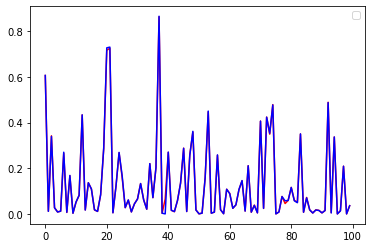

25640    0.606777
20237    0.011374
23550    0.339582
59495    0.026940
19329    0.008468
4905     0.012183
71120    0.270442
41268    0.007284
28783    0.168759
67003    0.003172
Name: Target_Cases, dtype: float64


In [ ]:
plt.plot(testPredict[:100], 'r-')
plt.plot(y_test.to_numpy()[:100], 'b-')
plt.legend()
plt.show()
print (y_test[:10])


In [ ]:
model.score(x_test, y_test)

0.9702933610014032

In [ ]:
model.score(x_train, y_train)

0.990641800360353

In [ ]:
def unnormalize(X, max, min):
  return (X * (max - min)) + min

out_train = unnormalize(trainPredict, (y_train * population_train).max(), (y_train * population_train).min())

In [ ]:
out_train

array([ 450833.04549713,  376583.84469312, 1798275.72138517, ...,
         26114.06318499,  250252.35701004,    4160.6492038 ])

In [ ]:
predicted_population_train = trainPredict * population_train

In [ ]:
max = data['Target_Cases'].max()
min = data['Target_Cases'].min()
predict_for_all_X = model.predict(X).flatten()
prediction_for_all_X = unnormalize(predict_for_all_X, max, min) * original_data['Population'].to_numpy()
actual_cases_for_all_X = unnormalize(Y,max,min) * original_data['Population']

In [ ]:
len(prediction_for_all_X)

88064

In [ ]:
for i in zip(prediction_for_all_X, actual_cases_for_all_X):
  print (i)

Streaming output truncated to the last 5000 lines.
(22.280571753397933, 14.159190981457112)
(22.280571753397933, 14.159190981457112)
(22.280571753397933, 42.69702681876877)
(35.54799720821038, 42.69702681876877)
(36.03884433922975, 42.69702681876877)
(40.660025312489424, 42.69702681876877)
(40.660025312489424, 42.69702681876877)
(38.30781193295172, 85.50378057473627)
(93.8792437250188, 85.50378057473627)
(95.92856412828273, 156.84837016801544)
(172.39558174550598, 156.84837016801544)
(178.7110756058598, 199.65512392398296)
(229.9481259097634, 213.92404184263876)
(214.56463010329568, 213.92404184263876)
(233.68451774681623, 213.92404184263876)
(235.61829742331747, 270.9997135172621)
(278.7030024261836, 285.2686314359179)
(413.19687200877894, 485.0334822970997)
(522.4491392364059, 485.0334822970997)
(501.88502111264467, 499.3024002157556)
(553.6463506740005, 613.4537435650019)
(665.3345640416915, 641.9915794023136)
(833.14690763775, 856.0253481821511)
(904.3776154097025, 884.563184019462

In [ ]:
output = pd.DataFrame(columns=['FIPS','Date','State','Predicted_Cases', 'Actual_Cases', 'Population'])
output['FIPS'] = original_data['FIPS']
output['Date'] = original_data['Date']
output['State'] = original_data['State']
output['Population'] = original_data['Population']
output['Predicted_Cases'] = np.round(0.0700824986894021 * prediction_for_all_X)
output['Actual_Cases'] = np.round(0.0700824986894021 * actual_cases_for_all_X)
output.to_csv("rf_prediction_cases_v1.csv")

In [ ]:
output

,FIPS,Date,State,Predicted_Cases,Actual_Cases,Population
0,1003,03-28-20,Alabama,5.0,10.0,223234.0
1,1003,03-29-20,Alabama,12.0,15.0,223234.0
2,1003,03-30-20,Alabama,17.0,18.0,223234.0
3,1003,03-31-20,Alabama,21.0,19.0,223234.0
4,1003,04-01-20,Alabama,24.0,23.0,223234.0
...,...,...,...,...,...,...
88059,56025,10-18-20,Wyoming,972.0,982.0,79858.0
88060,56025,10-20-20,Wyoming,1037.0,1065.0,79858.0
88061,56025,10-21-20,Wyoming,1107.0,1111.0,79858.0
88062,56025,10-22-20,Wyoming,1144.0,1136.0,79858.0


In [ ]:
output[output['FIPS']==6071]

,FIPS,Date,State,Predicted_Cases,Actual_Cases,Population
8843,6071,03-15-20,California,2.0,1.0,2180085.0
8844,6071,03-16-20,California,24.0,2.0,2180085.0
8845,6071,03-17-20,California,40.0,3.0,2180085.0
8846,6071,03-18-20,California,43.0,5.0,2180085.0
8847,6071,03-19-20,California,43.0,5.0,2180085.0
...,...,...,...,...,...,...
9061,6071,10-19-20,California,59831.0,59779.0,2180085.0
9062,6071,10-20-20,California,60027.0,60621.0,2180085.0
9063,6071,10-21-20,California,60927.0,60945.0,2180085.0
9064,6071,10-22-20,California,61473.0,61550.0,2180085.0


In [ ]:
max = data['Target_Cases'].max()
min = data['Target_Cases'].min()
print (max, min)
Y_actual = (Y * (max - min)) + min

1.0 0.0


No handles with labels found to put in legend.


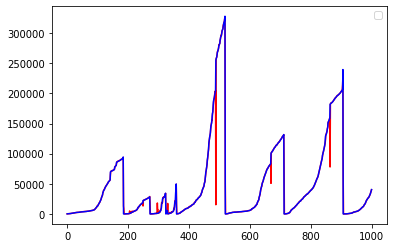

25640    0.606777
20237    0.011374
23550    0.339582
59495    0.026940
19329    0.008468
4905     0.012183
71120    0.270442
41268    0.007284
28783    0.168759
67003    0.003172
Name: Target_Cases, dtype: float64


In [ ]:
plt.plot(prediction_for_all_X[:1000], 'r-')
plt.plot(actual_cases_for_all_X[:1000], 'b-')
plt.legend()
plt.show()
print (y_test[:10])


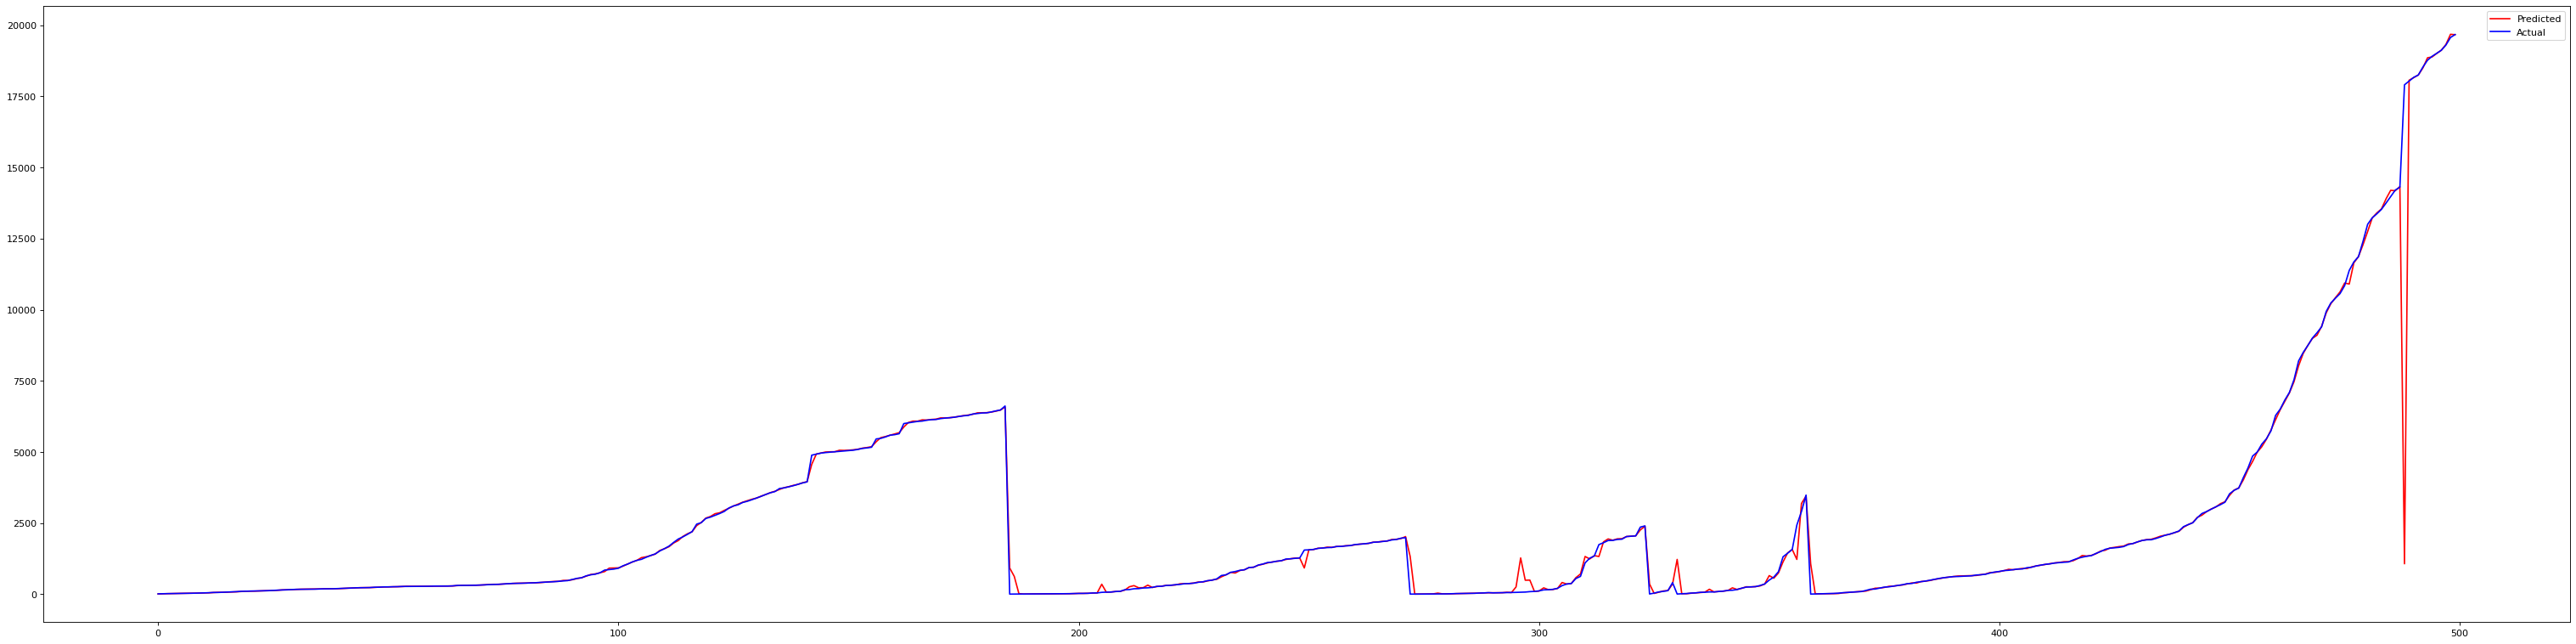

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(48, 12), dpi=80, facecolor='w', edgecolor='k')
lstm_prediction = pd.read_csv('rf_prediction_cases_v1.csv')
plt.plot(lstm_prediction['Predicted_Cases'].iloc[:500], 'r-', label="Predicted")
plt.plot(lstm_prediction['Actual_Cases'].iloc[:500], 'b-', label="Actual")
plt.legend()
plt.show()